In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import missingno as ms

plt.style.use('dark_background')

# `Análisis Visual de datos - Adquisición de Crédito Hipotecario`

**Grupo _ - Integrantes:**

**Weimar CCapatinta Huamani**

# `1. DEFINICIÓN DEL PROBLEMA`

`La empresa` desea automatizar el proceso de elegibilidad de préstamos (en
tiempo real) en función de los detalles del cliente proporcionados al completarel
formulario de solicitud en línea. El dataset cuenta con las
principales características de los clientes en cuánto a características
sociodemográficas y de mercado.

`La empresa` necesita saber a quién sería conveniente aceptarle el préstamo
hipotecario, para así poder rentabilizar su capital y no tener problemas de
morosidad o provisiones.

# `2. DESCRIPCIÓN DEL DATASET`

| `Variable` | `Descripción de la variable` |
|----------|--------------------|
| Loan_ID  | ID del cliente o persona |
| Gender | Género del cliente |
| Married | El cliente es casado? |
| Dependents | Número de hijos del cliente |
| Education | Nivel de educación del cliente |
| Self_Employed | El cliente esta empleado? |
| ApplicantIncome | Ingresos proviniente de su trabajo como dependiente |
| CoapplicantIncome | Ingresos provinientes de su trabajo como independiente |
| LoanAmount | Monto del préstamo que el cliente tiene con la empresa |
| Loan_Amount_Term | Termino del préstamo que el cliente tiene con la empresa |
| Credit_History | Historial crediticio del clienteen el SSFF |
| Property_Area | Área de residencia del cliente |
| `Loan_Status` | `Estado del préstamo (Target)` |

In [84]:
data = pd.read_csv('data/loan_prediction.csv')
print('El dataset cuenta con :\n', data.shape[0],' Filas y \n ',data.shape[1], ' Columnas')
data.head(2)

El dataset cuenta con :
 614  Filas y 
  13  Columnas


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


## `Selección de variables relevantes`

Seleccionamos las siguientes variables:
- Loan_ID: VARIABLE QUE NO APORTA VALOR
- Loan_Status: VARIABLE TARGET

In [85]:
Eliminar = 'Loan_ID' # VARIABLE QUE NO APORTA VALOR
target = 'Loan_Status' # VARIABLE TARGET

Eliminar variables que no aportan información relevante y crear el parametro target = Loan_Status

In [86]:
data.drop(Eliminar,axis=1,inplace=True)

# `3. ANÁLISIS EXPLORATORIO`

Dividimos el Dataset en un dataset de variables numéricas (data_num) y un set de variables categóricas (data_cate)

In [184]:
data_cate = data.select_dtypes('object')
data_num = data.select_dtypes('number')
print('El dataset data_cate cuenta con :\n', data_cate.shape[0],' Filas y \n ',data_cate.shape[1], ' Columnas\n')
print('El dataset data_num cuenta con :\n', data_num.shape[0],' Filas y \n ',data_num.shape[1], ' Columnas')

El dataset data_cate cuenta con :
 614  Filas y 
  7  Columnas

El dataset data_num cuenta con :
 614  Filas y 
  5  Columnas


## `3.1 Variables Numericas`

In [88]:
data_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


Veamos los principales estadísticos:

In [89]:
data_num.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- la diferencia que exista entre la media (mean) y la mediana (50%) indicara que existe outlayers (ApplicantIncome,CoapplicantIncome)
- Existe amplia diferencia entre los clientes que tienen ingresos dependientes donde el minimo es 150 y el máximo es 81000
- Tambien se puede apreciar la presencia de valores nulos en las variables (LoanAmount	Loan_Amount_Term	Credit_History)

Los tipos de datos se muestran a continuación:

In [81]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         599 non-null    float64
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         592 non-null    float64
 4   Loan_Amount_Term   600 non-null    float64
 5   Credit_History     564 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 28.9 KB


### Gráfica de barras

En las siguientes gráficas se puede apreciar la asimetrtia a la derecha de las variables (ApplicantIncome	CoapplicantIncome	LoanAmount	)

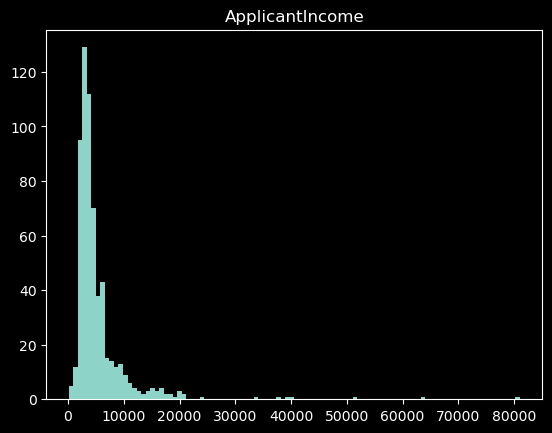

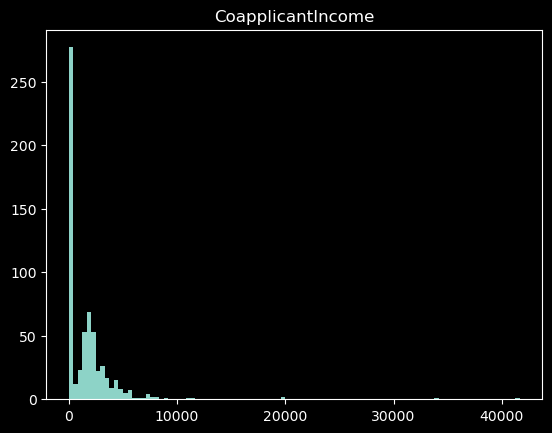

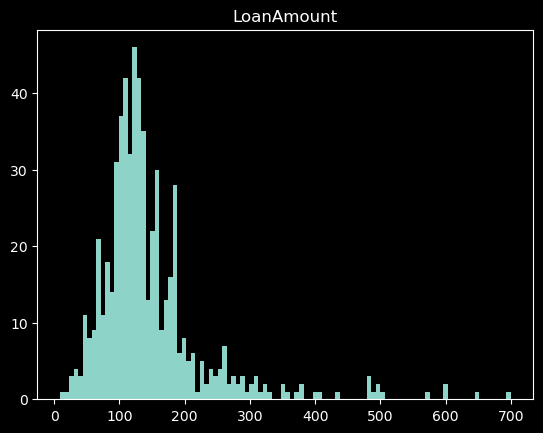

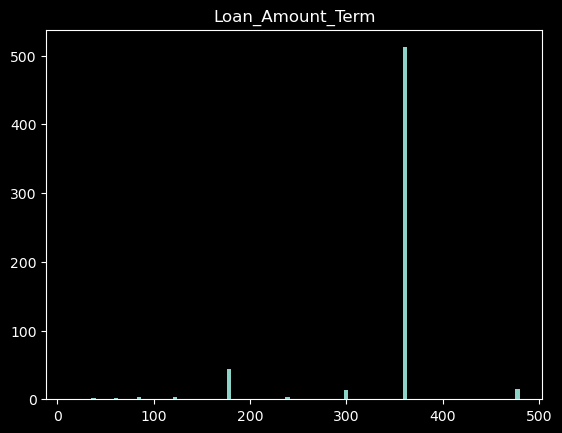

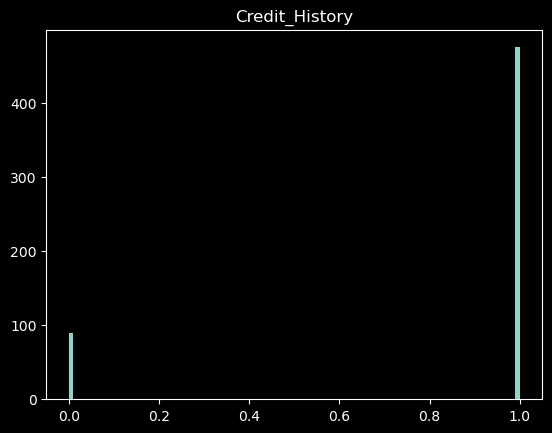

<Figure size 640x480 with 0 Axes>

In [114]:

for x in data_num.columns:
  #Q03 = int(data_num[x].quantile(0.75))+100 # Ver la escala del grafico
  plt.title(data_num[x].name)
  plt.hist(data_num[x], bins= 100)#,range=(0,Q03) )
  plt.show()

plt.tight_layout()

In [ ]:
# plt.figure(figsize = (10, 50))
# for i in range(len(data_num.columns)):
#     plt.subplot(len(data_num.columns), 1, i+1)
#     sns.distplot(data_num[data_num.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
#     plt.title(data_num.columns[i])

# plt.tight_layout()

### Diagrama de caja

A continuación el diagram de caja por variable y estado de préstamo

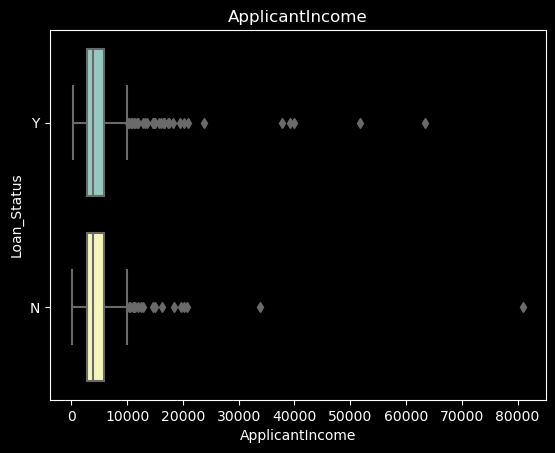

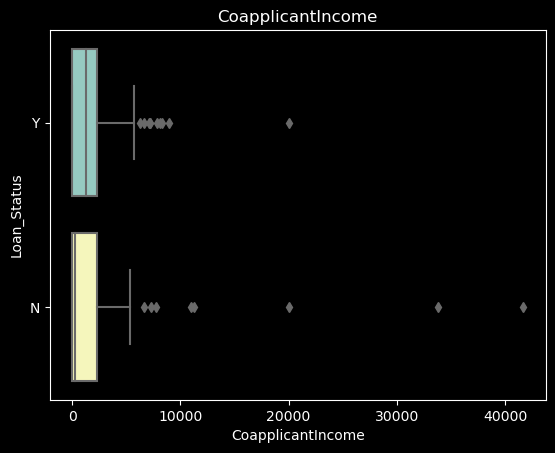

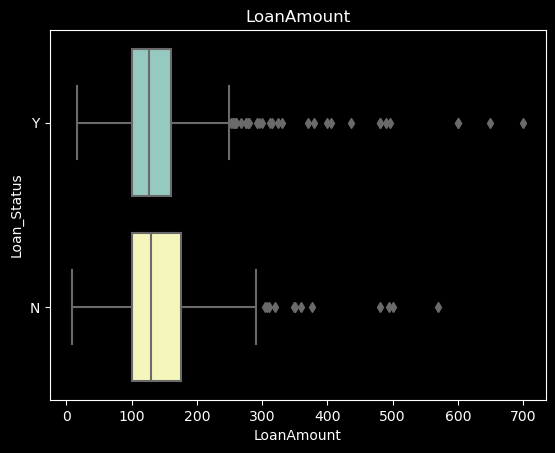

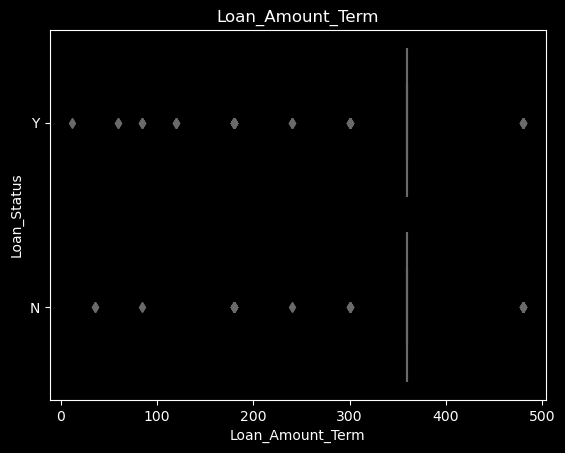

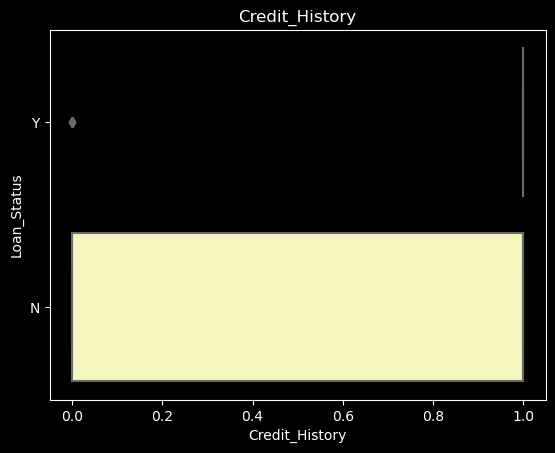

In [123]:
for x in data_num.columns:
  plt.title(data_num[x].name)
  sns.boxplot(x=data_num[x], y = data[target])
  plt.show()

### Valores nulos

Identificamos los valores nulos

In [128]:
data_num.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

De manera visual:

<Axes: >

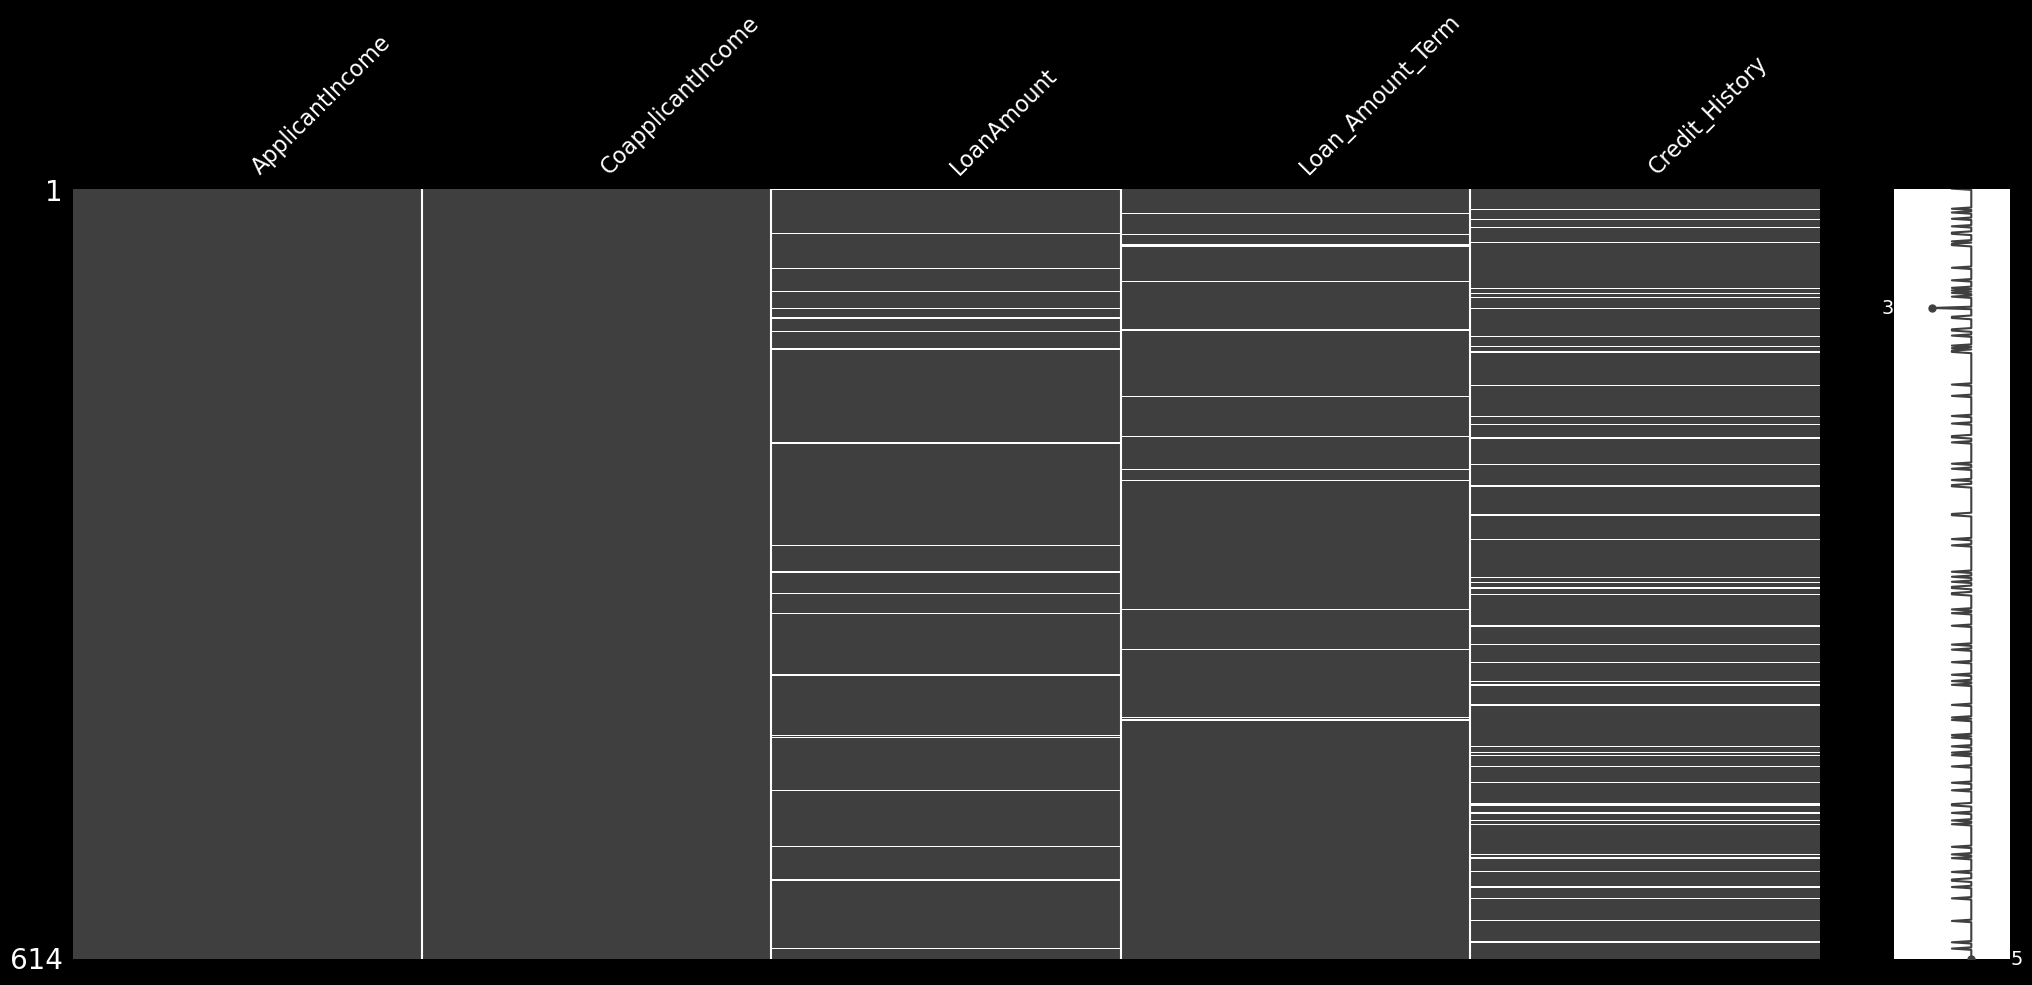

In [129]:
ms.matrix(data_num)

Utilizamos la mediana para la imputación de las variables numéricas

In [131]:
# Imputación de las variables cuantitativas usando la mediana

for i in ('LoanAmount','Loan_Amount_Term','Credit_History'):
  data_num[i].fillna(data_num[i].median(), inplace = True)

In [133]:
data_num.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

Estandarizacion de variables numericas.

In [174]:
data_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


A:

In [178]:
import scipy.stats as st
for i in ('ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'):
  data_num[i]=st.zscore(data_num[i])
data_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,-0.554487,-0.211241,0.273231,1.0
1,-0.134412,-0.038732,-0.211241,0.273231,1.0
2,-0.393747,-0.554487,-0.948996,0.273231,1.0
3,-0.462062,0.251980,-0.306435,0.273231,1.0
4,0.097728,-0.554487,-0.056551,0.273231,1.0


## `3.2 Variables Categoricas `

Veamos los principales estadísticos para variables categoricas:

In [135]:
data_cate.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [136]:
data_cate.describe()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


Registros unicos

In [137]:
data_cate.nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
Loan_Status      2
dtype: int64

### Gráficas

Diagrama por variable y estado de préstamo

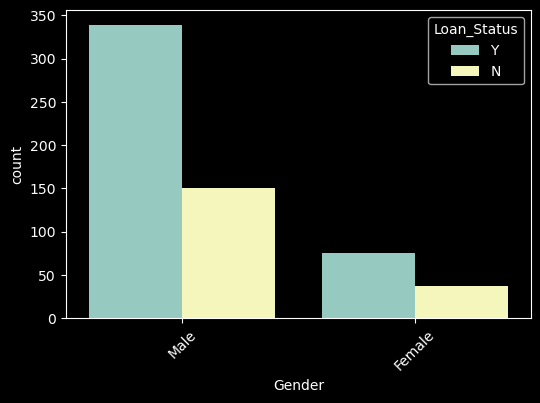

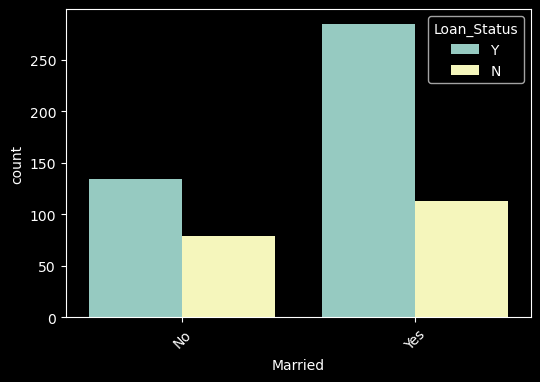

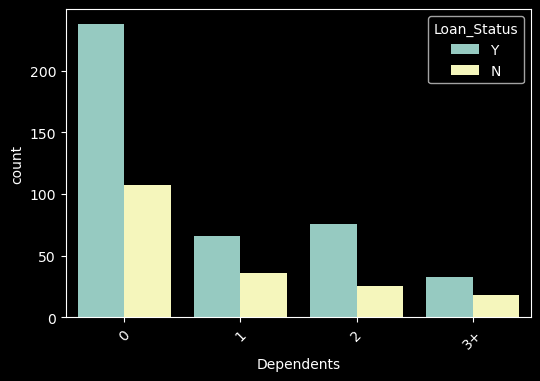

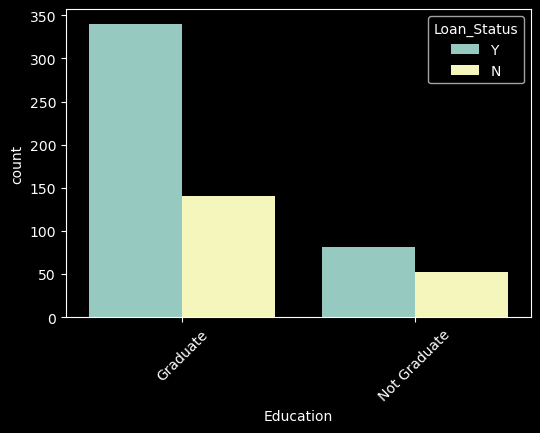

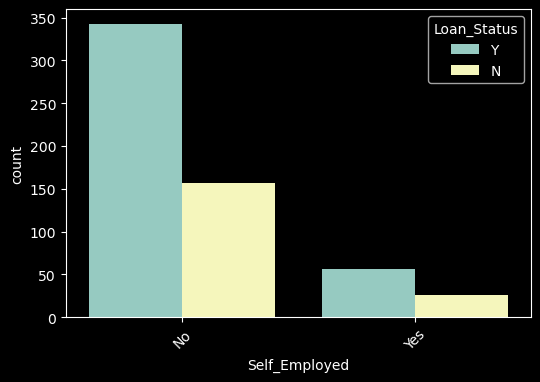

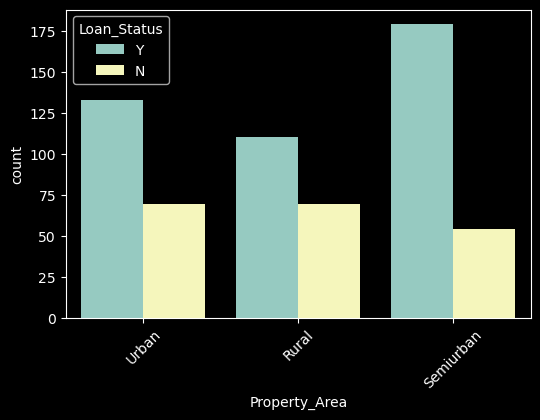

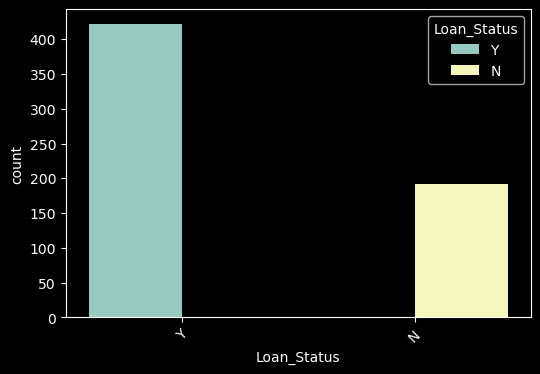

In [139]:
for i in data_cate:
    plt.figure(figsize=(6,4))
    plt.xticks(rotation=45)
    g = sns.countplot(x = data_cate[i], data = data, hue=target)
    #g.set_xticklabels(rotation=30)
    plt.show()

Personas de sexo masculino, casados, sin hijos y graduados, son caracteristicas de clientes que fueron aceptadas sus préstamos hipotecarios.

### Valores nulos

In [149]:
data_cate.isnull().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

Manera visual:

<Axes: >

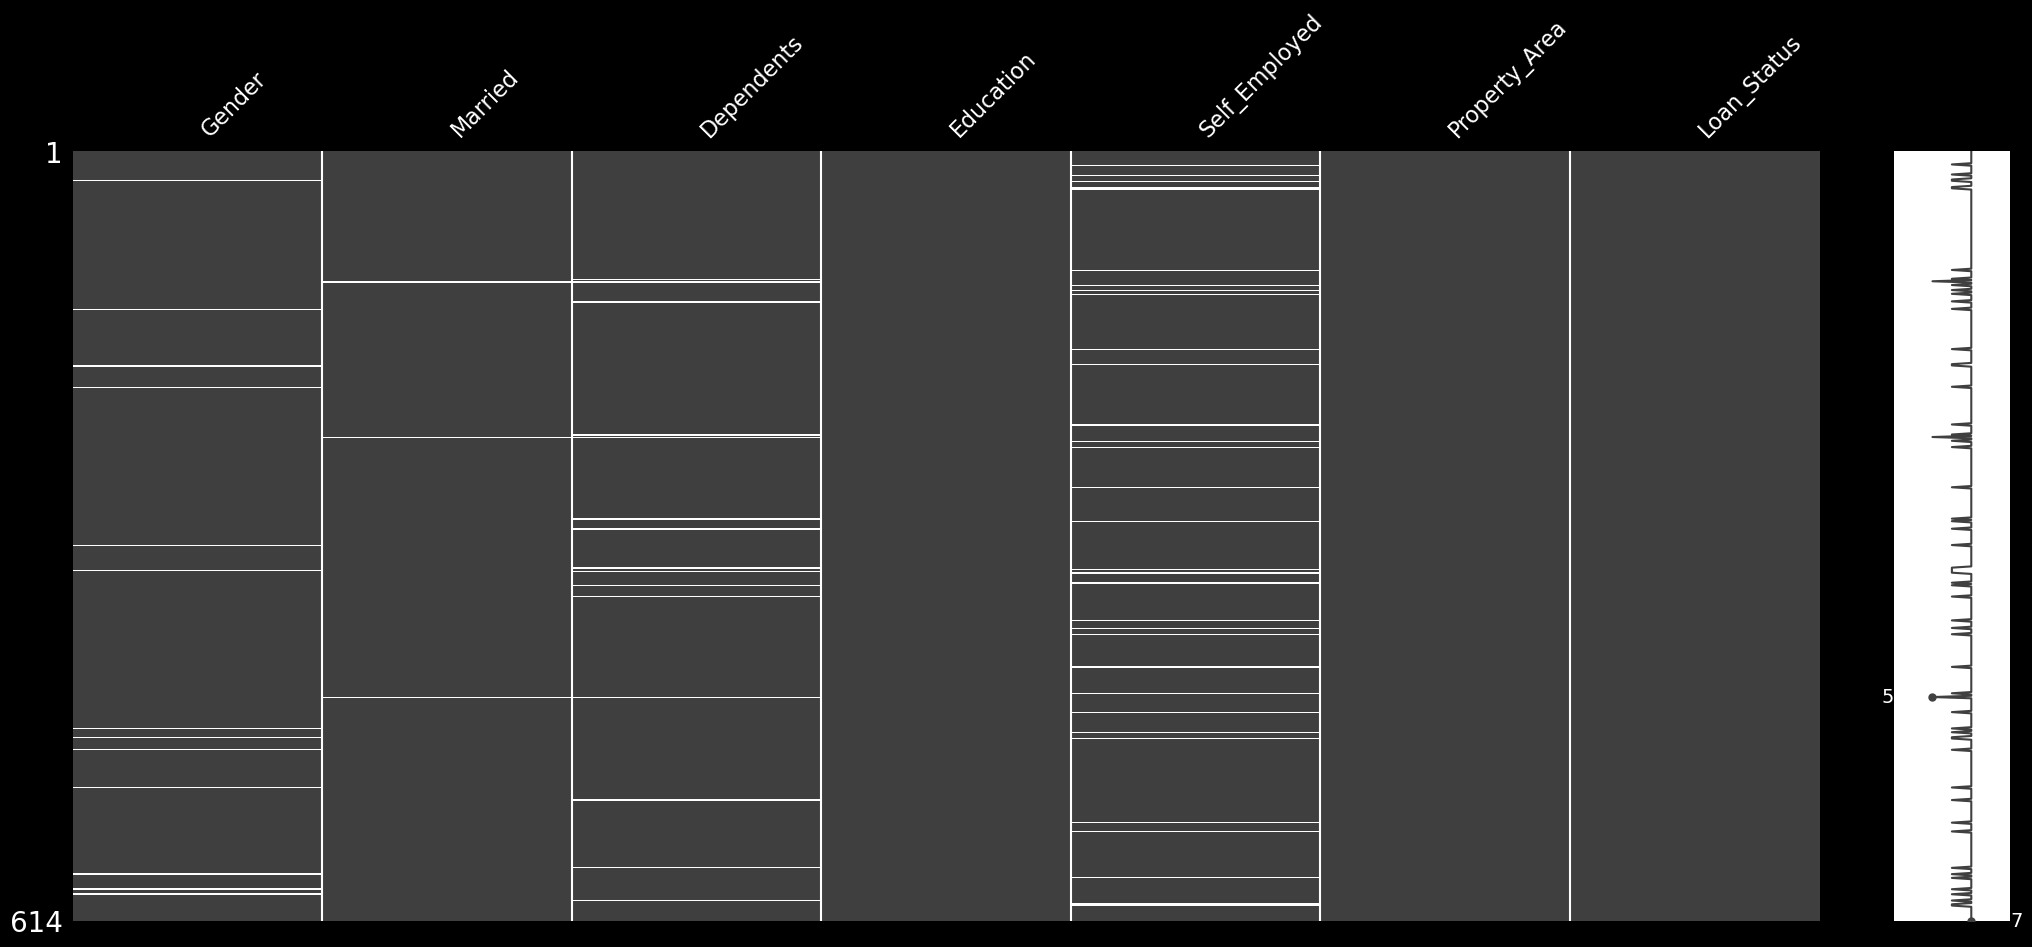

In [153]:
ms.matrix(data_cate)

Imputamos las varaibles catergóricas con la moda

In [157]:
# Imputación de las variables cualitativas usando la moda

for i in ('Gender','Married','Dependents','Self_Employed'):
  data_cate[i].fillna(data_cate[i].mode()[0], inplace = True)

data_cate.isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

Transformación de variables: renombramos el valor 3+ a "3" ya que hace referencia a más de 3 hijos

In [159]:
mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}
data_cate['Dependents'] = data_cate['Dependents'].map(mapping)

In [161]:
data_cate.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

Encoding de variables categoricas, para un rapido procesamiento convertimos las variables categoricas en valores numéricos

In [169]:
data_cate = pd.get_dummies(data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]], drop_first=True)
data_cate.head()

,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,0,0,0,1,1
1,1,1,0,0,0,0,0
2,1,1,0,1,0,1,1
3,1,1,1,0,0,1,1
4,1,0,0,0,0,1,1


## 4.3 Análisis multivariable

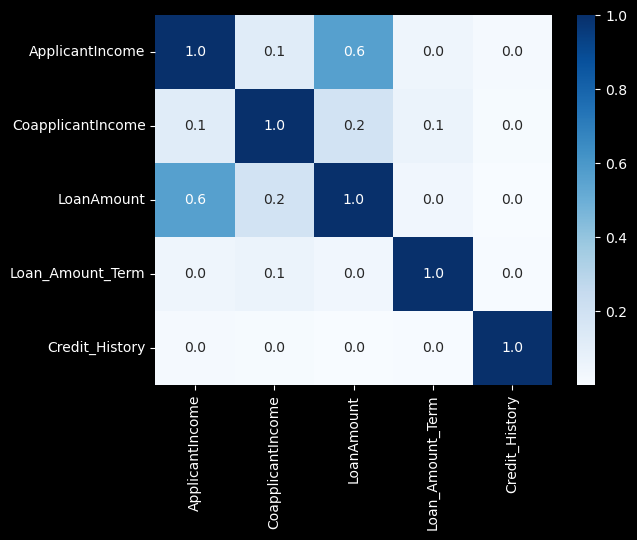

In [180]:
# Analizamos la correlación de las variables. 
sns.heatmap(abs(data_num.corr()), annot=True, fmt='.1f', cmap='Blues')
plt.show()

Existe relación entre LoanAmount y ApplicantIncome, al no ser tan alta no se elimina ninguna de las variables y se mantiene en el data set

Unir las variables categoricas y numericas

In [181]:
data_final = pd.concat([data_num,data_cate], axis=1)
data_final.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.072991,-0.554487,-0.211241,0.273231,1.0,1,0,0,0,0,1,1
1,-0.134412,-0.038732,-0.211241,0.273231,1.0,1,1,0,0,0,0,0
2,-0.393747,-0.554487,-0.948996,0.273231,1.0,1,1,0,1,0,1,1
3,-0.462062,0.251980,-0.306435,0.273231,1.0,1,1,1,0,0,1,1
4,0.097728,-0.554487,-0.056551,0.273231,1.0,1,0,0,0,0,1,1


Exportamos la data preprocesada.

        data_final.to_csv('Data_procsada.csv', index=False)

In [ ]:
data_final.to_csv('Data_procsada.csv', index=False)